In [524]:
# ! unzip downloads/171226/trained_model.zip

In [525]:
# # !python -m pip install --upgrade pip
# ! python -m pip install autogluon
# ! pip install seaborn

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

# 数据探索
* name - 汽车编码
* regDate - 汽车注册时间
* model - 车型编码
* brand - 品牌
* bodyType - 车身类型
* fuelType - 燃油类型
* gearbox - 变速箱
* power - 汽车功率
* kilometer - 汽车行驶公里
* notRepairedDamage - 汽车有尚未修复的损坏
* regionCode - 看车地区编码
* seller - 销售方
* offerType - 报价类型
* creatDate - 广告发布时间
* price - 汽车价格
* v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' 【匿名特征，包含v0-14在内15个匿名特征】


In [ ]:
train_file= r'train.csv'
test_file= r'test.csv'
# trained_model_file = r'ag-20240128_145158'
pd.set_option('display.max_columns', None) 
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
# train_data = TabularDataset(train_file)
# test_data = TabularDataset(test_file) #导入测试集

In [ ]:
# 箱线图异常值处理的代码
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        # 计算四分位数
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        # 计算上下界
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        # 根据上下界生成布尔规则
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    # 复制数据
    data_n = data.copy()
    # 获取指定列的数据
    data_series = data_n[col_name]
    # 调用箱线图函数获取异常值规则和上下界
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    # 根据异常值规则获取异常值的索引
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    # 删除异常值所在行
    data_n = data_n.drop(index)
    # 重置索引
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    # 获取低于下界的异常值
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    # 获取高于上界的异常值
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())

    # 绘制箱线图进行可视化比较
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64
-------------------------------
Delete number is: 3193
Now column number is: 145844
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64
Description of data larger than the upper bound is:
count     3193.000000
mean     35479.705606
std      10507.150903
min      26150.000000
25%      28500.000000
50%      31990.000000
75%      38500.000000
max      99999.000000
Name: price, dtyp

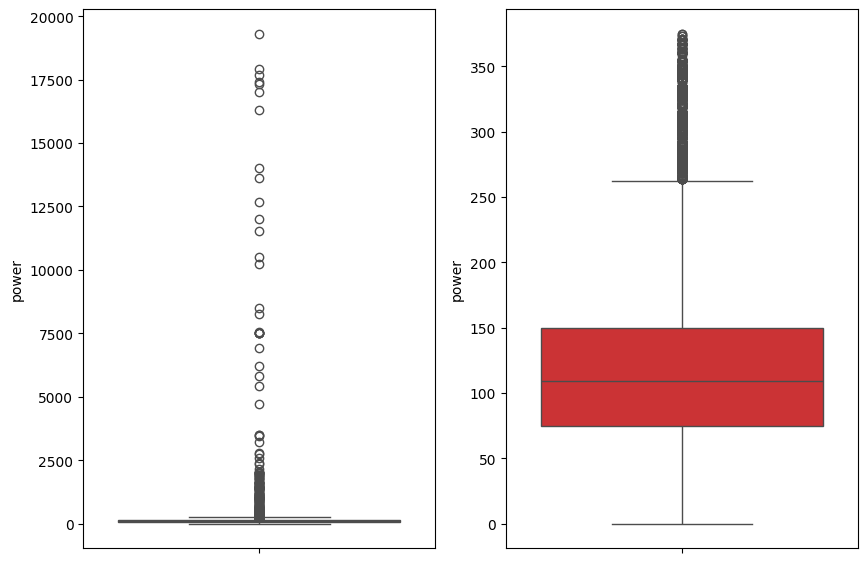

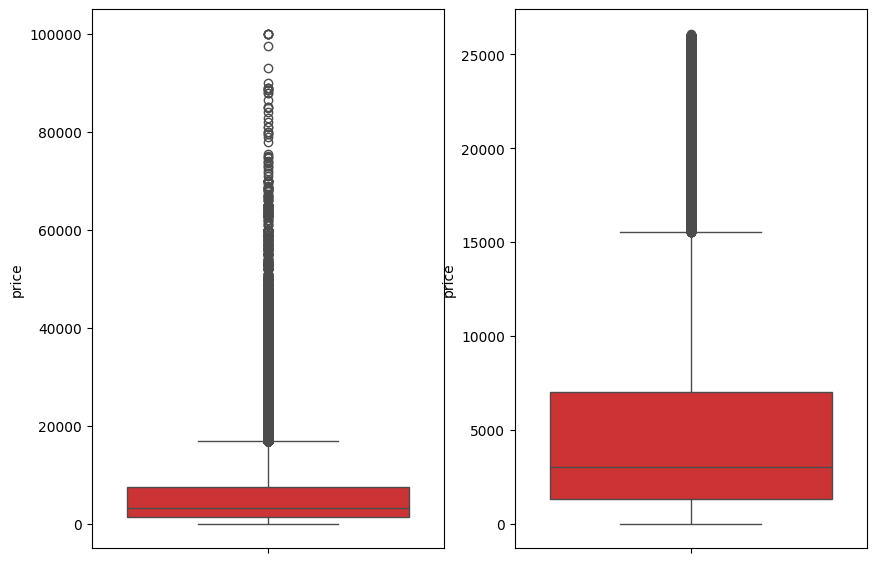

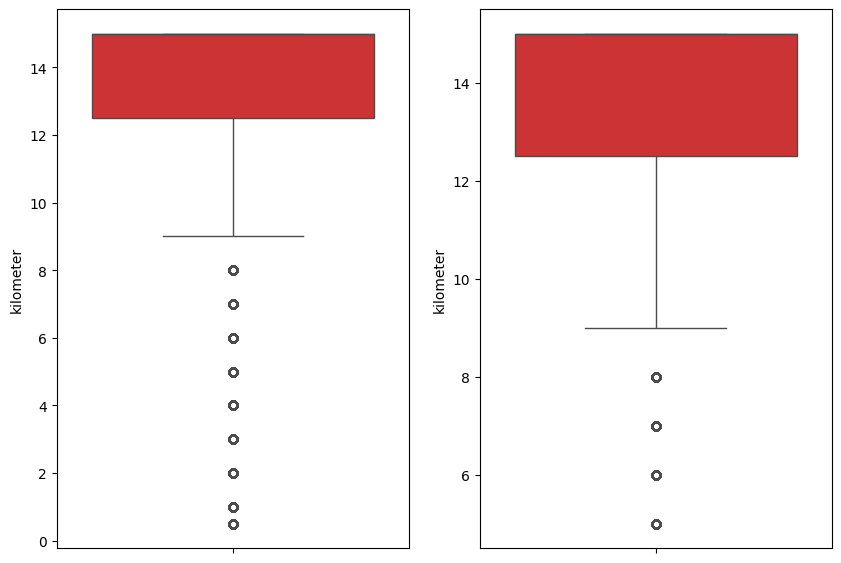

In [ ]:
outliers_character = ['power','price','kilometer']
for character in outliers_character:
    train_data = outliers_proc(train_data, character, scale=3)
    print('-------------------------------')

In [ ]:
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,137211.000000,137211.000000,1.372110e+05,137211.000000,137211.000000,133312.000000,129374.000000,131970.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.0,1.372110e+05,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000,137211.000000
mean,74977.054755,67748.004941,2.002863e+07,46.014576,7.946899,1.749767,0.377100,0.210252,112.967240,13.399399,2579.945114,0.000007,0.0,2.016033e+07,4793.898026,44.255837,-0.023280,-0.012470,0.263478,-0.002106,0.248578,0.045152,0.121940,0.055338,0.061865,0.040978,0.075377,-0.236845,-0.036873,-0.017800
std,43316.308494,61175.618789,4.970211e+04,48.461691,7.755663,1.722136,0.543014,0.407489,62.048314,2.827301,1885.594398,0.002700,0.0,9.904975e+01,4950.697712,2.332190,3.628616,2.857487,1.889414,1.179438,0.044633,0.051565,0.196063,0.027267,0.035446,3.735504,3.188651,2.370239,1.273074,0.998047
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.0,2.015081e+07,11.000000,30.451976,-4.066382,-4.470671,-4.820753,-4.156168,0.000000,0.000000,0.000000,0.000000,0.000000,-8.798810,-4.743363,-9.639552,-4.153899,-6.546556
25%,37443.500000,10590.000000,1.999070e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1015.000000,0.000000,0.0,2.016031e+07,1250.000000,43.052280,-3.190137,-1.009246,-1.200847,-0.941148,0.243807,0.000005,0.061592,0.034029,0.033816,-3.666874,-1.856746,-1.979109,-1.091153,-0.428755
50%,74956.000000,50474.000000,2.003031e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,2193.000000,0.000000,0.0,2.016032e+07,2950.000000,44.476206,-3.047408,-0.445580,0.274662,-0.100167,0.257781,0.000721,0.095025,0.054525,0.058397,1.745312,-0.283378,-0.357127,-0.084564,0.122863
75%,112514.500000,118203.500000,2.007020e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3838.000000,0.000000,0.0,2.016033e+07,6650.000000,45.802999,3.992616,0.141444,1.637859,0.845582,0.265196,0.101844,0.124194,0.075507,0.087345,2.893721,1.306415,1.442998,0.915972,0.635929
max,149999.000000,196811.000000,2.015101e+07,247.000000,39.000000,7.000000,6.000000,1.000000,375.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,26000.000000,50.919928,7.320308,18.802118,9.854702,4.959094,0.291838,0.151420,1.401999,0.146685,0.213617,12.319303,18.819042,12.234973,5.249750,2.532589


In [ ]:
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,2581.080680,0.0,0.0,2.016033e+07,44.400023,-0.065525,0.079706,0.078381,0.022361,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,1889.248559,0.0,0.0,1.113395e+02,2.459920,3.636631,2.930829,2.019136,1.194215,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.014031e+07,31.122325,-4.231855,-4.032142,-5.801254,-4.233626,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1006.000000,0.0,0.0,2.016031e+07,43.120935,-3.193169,-0.967832,-1.456793,-0.922153,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2204.500000,0.0,0.0,2.016032e+07,44.601493,-3.053506,-0.384910,0.118448,-0.068187,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3842.000000,0.0,0.0,2.016033e+07,45.987018,3.978703,0.239689,1.563490,0.871565,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,8120.000000,0.0,0.0,2.016041e+07,51.676686,7.190759,18.865988,9.386558,4.959106,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137211 entries, 0 to 137210
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             137211 non-null  int64  
 1   name               137211 non-null  int64  
 2   regDate            137211 non-null  int64  
 3   model              137211 non-null  float64
 4   brand              137211 non-null  int64  
 5   bodyType           133312 non-null  float64
 6   fuelType           129374 non-null  float64
 7   gearbox            131970 non-null  float64
 8   power              137211 non-null  int64  
 9   kilometer          137211 non-null  float64
 10  notRepairedDamage  137211 non-null  object 
 11  regionCode         137211 non-null  int64  
 12  seller             137211 non-null  int64  
 13  offerType          137211 non-null  int64  
 14  creatDate          137211 non-null  int64  
 15  price              137211 non-null  int64  
 16  v_

In [ ]:
train_data['used_time'] = (pd.to_datetime(train_data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(train_data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

test_data['used_time'] = (pd.to_datetime(test_data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(test_data['regDate'], format='%Y%m%d', errors='coerce')).dt.days


# median_value = train_data['used_time'].median()  # 计算'used_time'列的中位数
# train_data['used_time'].fillna(median_value, inplace=True)  # 用中位数填充'used_time'列的空缺值

# median_value = test_data['used_time'].median()  # 计算'used_time'列的中位数
# test_data['used_time'].fillna(median_value, inplace=True)  # 用中位数填充'used_time'列的空缺值


In [ ]:
train_data['price'] = np.log(train_data['price'])

In [ ]:
colWithNa = ['bodyType', 'fuelType', 'gearbox']
for col in colWithNa:    
    train_data[col].fillna(-1, inplace=True)
    test_data[col].fillna(-1, inplace=True)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           50000 non-null  float64
 6   fuelType           50000 non-null  float64
 7   gearbox            50000 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [ ]:
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used_time
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,7.522941,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,4385.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,8.188689,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,4757.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,8.735847,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,4382.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,7.783224,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,7125.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,8.556414,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137206,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,8.682708,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,5772.0
137207,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9.159047,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,2322.0
137208,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,8.922658,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,2003.0
137209,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,8.516993,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,3673.0


In [ ]:
test_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used_time
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,0.0,5019,0,0,20160308,42.142061,-3.094739,-0.721300,1.466344,1.009846,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322,5790.0
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,0.0,1505,0,0,20160310,43.907034,-3.244605,-0.766430,1.276718,-1.065338,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542,7698.0
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,-,1776,0,0,20160309,45.389665,3.372384,-0.965565,-2.447316,0.624268,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173,2468.0
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,0.0,26,0,0,20160314,42.788775,4.035052,-0.217403,1.708806,1.119165,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610,5035.0
4,200004,76998,20030301,46.0,6,0.0,-1.0,0.0,116,15.0,0.0,738,0,0,20160306,43.670763,-3.135382,-1.134107,0.470315,0.134032,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014,4754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,-1.0,1.0,150,15.0,-,5564,0,0,20160309,46.321013,-3.304401,0.073363,-0.622359,-0.778349,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587,4173.0
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,0.0,5220,0,0,20160323,48.086547,-3.318641,0.965881,-2.672160,0.357440,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221,1079.0
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,0.0,3795,0,0,20160316,46.145279,-3.305263,-0.015283,-0.288329,-0.687112,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602,4113.0
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,0.0,61,0,0,20160327,45.507088,-3.197006,-1.141252,-0.434930,-1.845040,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379,5017.0


In [ ]:
label = 'price'
train_data[label].describe()

count    137211.000000
mean          7.925188
std           1.137525
min           2.397895
25%           7.130899
50%           7.989560
75%           8.802372
max          10.165852
Name: price, dtype: float64

In [ ]:
print('train_dataset:\n', train_data.isnull().sum(),'\n\ntest_dataset:\n',test_data.isnull().sum()) # .append(test_data.isnull().sum())

train_dataset:
 SaleID                   0
name                     0
regDate                  0
model                    0
brand                    0
bodyType                 0
fuelType                 0
gearbox                  0
power                    0
kilometer                0
notRepairedDamage        0
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
used_time            10396
dtype: int64 

test_dataset:
 SaleID                  0
name                    0
regDate                 0
model       

In [ ]:
train_data['regionCode']

0         1046
1         4366
2         2806
3          434
4         6977
          ... 
137206    4576
137207    2826
137208    3302
137209    1877
137210     235
Name: regionCode, Length: 137211, dtype: int64

In [ ]:
# 从邮编中提取城市信息
train_data['city'] = train_data['regionCode'].apply(lambda x : str(x)[:-3])
test_data['city'] = test_data['regionCode'].apply(lambda x : str(x)[:-3])

In [ ]:
train_data['city']

0         1
1         4
2         2
3          
4         6
         ..
137206    4
137207    2
137208    3
137209    1
137210     
Name: city, Length: 137211, dtype: object

In [ ]:
def normalize(train_data, test_data, labels):
    for label in labels:
        # 归一化训练数据
        train_data[label] = ((train_data[label] - np.min(train_data[label])) /
                             (np.max(train_data[label]) - np.min(train_data[label])))
        
        # 归一化测试数据
        test_data[label] = ((test_data[label] - np.min(test_data[label])) /
                            (np.max(test_data[label]) - np.min(test_data[label])))
    
    return train_data, test_data

In [ ]:
# power特征取对数再归一化
train_data['power'] = np.log(train_data['power'] + 1) 
test_data['power'] = np.log(test_data['power'] + 1) 
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14','used_time']
# categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']
normalize(train_data,test_data,numeric_features)
# data = pd.concat([train_data, test_data], ignore_index=True)
# data['power'].plot.hist()

(        SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
 0            0     736  20040402   30.0      6       1.0       0.0      0.0   
 1            1    2262  20030301   40.0      1       2.0       0.0      0.0   
 2            2   14874  20040403  115.0     15       1.0       0.0      0.0   
 3            3   71865  19960908  109.0     10       0.0       0.0      1.0   
 4            4  111080  20120103  110.0      5       1.0       0.0      0.0   
 ...        ...     ...       ...    ...    ...       ...       ...      ...   
 137206  149995  163978  20000607  121.0     10       4.0       0.0      1.0   
 137207  149996  184535  20091102  116.0     11       0.0       0.0      0.0   
 137208  149997  147587  20101003   60.0     11       1.0       1.0      0.0   
 137209  149998   45907  20060312   34.0     10       3.0       1.0      0.0   
 137210  149999  177672  19990204   19.0     28       6.0       0.0      1.0   
 
            power  kilometer notRepair

In [ ]:
# # kilometer归一化
# train_data['kilometer'] = ((train_data['kilometer'] - np.min(train_data['kilometer'])) / 
#                         (np.max(train_data['kilometer']) - np.min(train_data['kilometer'])))

# test_data['kilometer'] = ((test_data['kilometer'] - np.min(test_data['kilometer'])) / 
#                         (np.max(test_data['kilometer']) - np.min(test_data['kilometer'])))

# data = pd.concat([train_data, test_data], ignore_index=True)
# data['kilometer'].plot.hist()

In [ ]:
train_data = train_data.drop(['regionCode', 'name', 'seller', 'model', 'creatDate', 'regDate'], axis=1)
test_data = test_data.drop(['regionCode', 'name', 'seller', 'model', 'creatDate', 'regDate'], axis=1)

In [ ]:
train_data = train_data.drop('offerType',axis=1)
test_data = test_data.drop('offerType',axis=1)

In [ ]:
# 对类别特征进行 OneEncoder
train_data = pd.get_dummies(train_data, columns= ['brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'city'])
test_data = pd.get_dummies(test_data, columns= ['brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'city'])
# categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']
# categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'city'].remove('model')
# train_data = pd.get_dummies(train_data, columns=categorical_features)
# test_data = pd.get_dummies(test_data, columns=categorical_features)

In [ ]:
def find_unique_columns(df1, df2):
    """
    找出两个 DataFrame 中不共有的列名和有共同列名但数据类型不同的列名
    :param df1: 第一个 DataFrame
    :param df2: 第二个 DataFrame
    :return: 不共有的列名列表和数据类型不同的列名列表
    """
    unique_columns1 = list(set(df1.columns) - set(df2.columns))
    unique_columns2 = list(set(df2.columns) - set(df1.columns))
    diff_dtypes_cols = []
    common_columns = set(df1.columns).intersection(set(df2.columns))
    for col in common_columns:
        if df1[col].dtype != df2[col].dtype:
            diff_dtypes_cols.append(col)
    return unique_columns1, unique_columns2, diff_dtypes_cols

u_col1, u_col2, diff_dtypes_cols = find_unique_columns(train_data,test_data)
print([u_col1, u_col2, diff_dtypes_cols])
u_col1.remove('price')
for c in u_col1:
    train_data = train_data.drop(c,axis=1)
for c in u_col2:
    test_data = test_data.drop(c,axis=1)

[['price'], [], []]


In [ ]:
u_col1, u_col2, diff_dtypes_cols = find_unique_columns(train_data,test_data)
print([u_col1, u_col2, diff_dtypes_cols])

[['price'], [], []]


In [ ]:
train_data

,SaleID,power,kilometer,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used_time,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,brand_12,brand_13,brand_14,brand_15,brand_16,brand_17,brand_18,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28,brand_29,brand_30,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_38,brand_39,bodyType_-1.0,bodyType_0.0,bodyType_1.0,bodyType_2.0,bodyType_3.0,bodyType_4.0,bodyType_5.0,bodyType_6.0,bodyType_7.0,fuelType_-1.0,fuelType_0.0,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_-1.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_-,notRepairedDamage_0.0,notRepairedDamage_1.0,city_,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,0,0.693281,0.75,7.522941,0.630538,0.705449,0.194258,0.475658,0.581437,0.807557,0.673547,0.092403,0.155546,0.456246,0.280186,0.320318,0.330006,0.526305,0.821808,0.465229,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False
1,1,0.000000,1.00,8.188689,0.725686,0.816962,0.198025,0.422570,0.299937,0.907274,0.799128,0.096812,0.181323,0.096348,0.184596,0.290280,0.393566,0.258541,0.748097,0.506357,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False
2,2,0.860071,0.75,8.735847,0.758570,0.780751,0.248797,0.260454,0.346590,0.861471,0.758900,0.117794,0.423852,0.126745,0.187141,0.277855,0.512234,0.353183,0.695726,0.464898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False
3,3,0.888402,1.00,7.783224,0.744359,0.751663,0.189924,0.388700,0.211523,0.939881,0.728440,0.086993,0.227661,0.000000,0.203106,0.255887,0.417732,0.182434,0.668329,0.768159,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False
4,4,0.714064,0.00,8.556414,0.680651,0.535521,0.216684,0.221425,0.702367,0.781377,0.483458,0.065535,0.537337,0.568935,0.326855,0.239965,0.483241,0.743160,0.932911,0.149696,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
test_data

,SaleID,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used_time,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,brand_12,brand_13,brand_14,brand_15,brand_16,brand_17,brand_18,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28,brand_29,brand_30,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_38,brand_39,bodyType_-1.0,bodyType_0.0,bodyType_1.0,bodyType_2.0,bodyType_3.0,bodyType_4.0,bodyType_5.0,bodyType_6.0,bodyType_7.0,fuelType_-1.0,fuelType_0.0,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_-1.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_-,notRepairedDamage_0.0,notRepairedDamage_1.0,city_,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,200000,0.468908,1.000000,0.536126,0.099550,0.144590,0.478515,0.570393,0.812292,0.001570,0.074612,0.293624,0.447328,0.598154,0.220090,0.289348,0.524504,0.788928,0.625845,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False
1,200001,0.436372,0.379310,0.621995,0.086429,0.142619,0.466030,0.344651,0.898147,0.000000,0.085242,0.297122,0.167461,0.568942,0.174036,0.335429,0.286700,0.674174,0.833915,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False
2,200002,0.486226,0.310345,0.694127,0.665718,0.133923,0.220831,0.528449,0.898738,0.592145,0.000000,0.505884,0.348248,0.242686,0.213838,0.424919,0.591467,0.814517,0.263577,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False
3,200003,0.413405,1.000000,0.567590,0.723732,0.166596,0.494479,0.582285,0.810678,0.663463,0.070100,0.170392,0.457225,0.294537,0.346088,0.266058,0.534510,0.749866,0.543511,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False
4,200004,0.482818,1.000000,0.610500,0.095991,0.126562,0.412934,0.475121,0.882627,0.000000,0.047275,0.366899,0.325845,0.561506,0.163685,0.339892,0.444916,0.748655,0.512868,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
# 减少dataframe内存
import numpy as np

def reduce_mem_usage(df, verbose=True):
    """
    Iterate through all numeric columns of a dataframe and modify the data type to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:4] == "uint":
                if c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                        df[col] = df[col].astype(np.uint64)

            # 处理有符号整数
            elif str(col_type)[:3] == "int":
                if c_min >= 0:  # 如果最小值大于等于0，则可能是无符号整数
                    if c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                        df[col] = df[col].astype(np.uint8)
                    elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                        df[col] = df[col].astype(np.uint16)
                    elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                        df[col] = df[col].astype(np.uint32)
                    elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                        df[col] = df[col].astype(np.uint64)
                else:
                        # 否则按有符号整数处理
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min >= np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max: 
                        df[col] = df[col].astype(np.int64)

            # 处理浮点数
            elif str(col_type)[:5] == "float":
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)  # 修改这里，将原本的np.float32改为np.float64以避免精度损失

    if verbose:
        print(f"Memory usage of dataframe is {start_mem:.2f} MB")
        end_mem = df.memory_usage().sum() / 1024**2
        print(f"Memory usage after optimization is: {end_mem:.2f} MB")
        decrease = 100 * (start_mem - end_mem) / start_mem
        print(f"Decreased by {decrease:.2f}%")

    return df

In [ ]:
train_data = reduce_mem_usage(train_data)
print('-'*50)
train_data.info()
print('-'*50)
train_data

Memory usage of dataframe is 30.36 MB
Memory usage after optimization is: 15.44 MB
Decreased by 49.14%
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137211 entries, 0 to 137210
Data columns (total 92 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SaleID                 137211 non-null  int64  
 1   power                  137211 non-null  float16
 2   kilometer              137211 non-null  float16
 3   price                  137211 non-null  float16
 4   v_0                    137211 non-null  float16
 5   v_1                    137211 non-null  float16
 6   v_2                    137211 non-null  float16
 7   v_3                    137211 non-null  float16
 8   v_4                    137211 non-null  float16
 9   v_5                    137211 non-null  float16
 10  v_6                    137211 non-null  float16
 11  v_7                    137211 non-null  f

,SaleID,power,kilometer,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used_time,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,brand_12,brand_13,brand_14,brand_15,brand_16,brand_17,brand_18,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28,brand_29,brand_30,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_38,brand_39,bodyType_-1.0,bodyType_0.0,bodyType_1.0,bodyType_2.0,bodyType_3.0,bodyType_4.0,bodyType_5.0,bodyType_6.0,bodyType_7.0,fuelType_-1.0,fuelType_0.0,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_-1.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_-,notRepairedDamage_0.0,notRepairedDamage_1.0,city_,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,0,0.693359,0.750000,7.523438,0.630371,0.705566,0.194214,0.475586,0.581543,0.807617,0.673340,0.092407,0.155518,0.456299,0.280273,0.320312,0.330078,0.526367,0.821777,0.465332,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False
1,1,0.000000,1.000000,8.187500,0.725586,0.816895,0.197998,0.422607,0.300049,0.907227,0.799316,0.096802,0.181274,0.096375,0.184570,0.290283,0.393555,0.258545,0.748047,0.506348,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False
2,2,0.859863,0.750000,8.734375,0.758789,0.780762,0.248779,0.260498,0.346680,0.861328,0.758789,0.117798,0.423828,0.126709,0.187134,0.277832,0.512207,0.353271,0.695801,0.464844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False
3,3,0.888184,1.000000,7.785156,0.744141,0.751465,0.189941,0.388672,0.211548,0.939941,0.728516,0.086975,0.227661,0.000000,0.203125,0.255859,0.417725,0.182495,0.668457,0.768066,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False
4,4,0.713867,0.000000,8.554688,0.680664,0.535645,0.216675,0.221436,0.702148,0.781250,0.483398,0.065552,0.537109,0.568848,0.326904,0.239990,0.483154,0.743164,0.933105,0.149658,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
test_data = reduce_mem_usage(test_data)
print('-'*50)
test_data.info()
print('-'*50)
test_data

Memory usage of dataframe is 10.68 MB
Memory usage after optimization is: 5.34 MB
Decreased by 50.00%
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 91 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SaleID                 50000 non-null  uint32 
 1   power                  50000 non-null  float16
 2   kilometer              50000 non-null  float16
 3   v_0                    50000 non-null  float16
 4   v_1                    50000 non-null  float16
 5   v_2                    50000 non-null  float16
 6   v_3                    50000 non-null  float16
 7   v_4                    50000 non-null  float16
 8   v_5                    50000 non-null  float16
 9   v_6                    50000 non-null  float16
 10  v_7                    50000 non-null  float16
 11  v_8                    50000 non-null  float16
 12  v_9  

,SaleID,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used_time,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,brand_12,brand_13,brand_14,brand_15,brand_16,brand_17,brand_18,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28,brand_29,brand_30,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_38,brand_39,bodyType_-1.0,bodyType_0.0,bodyType_1.0,bodyType_2.0,bodyType_3.0,bodyType_4.0,bodyType_5.0,bodyType_6.0,bodyType_7.0,fuelType_-1.0,fuelType_0.0,fuelType_1.0,fuelType_2.0,fuelType_3.0,fuelType_4.0,fuelType_5.0,fuelType_6.0,gearbox_-1.0,gearbox_0.0,gearbox_1.0,notRepairedDamage_-,notRepairedDamage_0.0,notRepairedDamage_1.0,city_,city_1,city_2,city_3,city_4,city_5,city_6,city_7,city_8
0,200000,0.468994,1.000000,0.536133,0.099548,0.144531,0.478516,0.570312,0.812500,0.001570,0.074585,0.293701,0.447266,0.598145,0.220093,0.289307,0.524414,0.789062,0.625977,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False
1,200001,0.436279,0.379395,0.622070,0.086426,0.142578,0.466064,0.344727,0.897949,0.000000,0.085266,0.297119,0.167480,0.568848,0.174072,0.335449,0.286621,0.674316,0.833984,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False
2,200002,0.486328,0.310303,0.694336,0.665527,0.133911,0.220825,0.528320,0.898926,0.592285,0.000000,0.505859,0.348145,0.242676,0.213867,0.424805,0.591309,0.814453,0.263672,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False
3,200003,0.413330,1.000000,0.567383,0.723633,0.166626,0.494385,0.582520,0.810547,0.663574,0.070129,0.170410,0.457275,0.294434,0.346191,0.266113,0.534668,0.750000,0.543457,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False
4,200004,0.482910,1.000000,0.610352,0.096008,0.126587,0.412842,0.475098,0.882812,0.000000,0.047272,0.366943,0.325928,0.561523,0.163696,0.339844,0.444824,0.748535,0.512695,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
# 调试上述代码，不需要训练的时候在此处抛出异常
assert(1)

# 开始训练

## xgboost


In [ ]:
train_round = 5000

import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 1. 读取数据
train_df = train_data # pd.read_csv('train_data.csv')
test_df = test_data # pd.read_csv('test_data.csv')

# 定义特征和目标变量
X_train = train_df.drop('price', axis=1)
y_train = train_df['price']
X_test = test_df  # 测试集中已删除'price'列

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 转换为DMatrix格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# 设置XGBoost参数
params = {
    'objective': 'reg:squarederror',  # 回归任务
    'eta': 0.05,  # 学习率
    'max_depth': 6,  # 树的最大深度
    # 'subsample': 0.8,  # 子采样比例
    'colsample_bytree': 0.8,  # 每棵树使用的特征子集的比例
    'eval_metric': ['mae'],  # 使用MAE作为评估指标
    'verbosity': 1,  # 显示详细信息
}

# 训练模型并存储评估结果
evals_result = {}
model = xgb.train(params, dtrain, num_boost_round=train_round, evals=watchlist,
                  early_stopping_rounds=20, evals_result=evals_result)

# 输出每一轮的损失和验证集上的MAE
for epoch in range(len(evals_result['eval']['mae'])):
    print(f"Round {epoch+1}: MAE={evals_result['eval']['mae'][epoch]}")

# 在测试集上进行预测
predictions = model.predict(dtest)

# 将预测结果与id组合成DataFrame并写入CSV文件
test_ids = test_df['SaleID']  # 假设'id'列存在且是第一列
output_df = pd.DataFrame({'SaleID': test_ids, 'price': np.exp(predictions)})
output_df.to_csv('predictions.csv', index=False)

# 保存模型权重
model.save_model('xgboost_regression_model.bin')  # 保存模型至二进制文件

[0]	train-mae:0.88917	eval-mae:0.88788
[1]	train-mae:0.84848	eval-mae:0.84731
[2]	train-mae:0.81003	eval-mae:0.80902
[3]	train-mae:0.77357	eval-mae:0.77270
[4]	train-mae:0.73895	eval-mae:0.73828
[5]	train-mae:0.70605	eval-mae:0.70556
[6]	train-mae:0.67515	eval-mae:0.67481
[7]	train-mae:0.64590	eval-mae:0.64568
[8]	train-mae:0.61802	eval-mae:0.61798
[9]	train-mae:0.59161	eval-mae:0.59172
[10]	train-mae:0.56670	eval-mae:0.56701
[11]	train-mae:0.54314	eval-mae:0.54356
[12]	train-mae:0.52079	eval-mae:0.52137
[13]	train-mae:0.49979	eval-mae:0.50053
[14]	train-mae:0.47995	eval-mae:0.48083
[15]	train-mae:0.46118	eval-mae:0.46221
[16]	train-mae:0.44346	eval-mae:0.44468
[17]	train-mae:0.42671	eval-mae:0.42805
[18]	train-mae:0.41089	eval-mae:0.41240
[19]	train-mae:0.39601	eval-mae:0.39768
[20]	train-mae:0.38199	eval-mae:0.38380
[21]	train-mae:0.36865	eval-mae:0.37061
[22]	train-mae:0.35611	eval-mae:0.35817
[23]	train-mae:0.34434	eval-mae:0.34650
[24]	train-mae:0.33310	eval-mae:0.33544
[25]	train

In [ ]:
# # import xgboost as xgb

# # 一个之前训练好的模型并且已经保存为 'pretrained_model.xgb'
# # 加载预训练模型
# dtrain_new = dtrain
# pretrained_model = xgb.Booster()
# pretrained_model.load_model('pretrained_model.xgb')

# # 准备新的数据集或者调整现有的数据集dtrain_new以进行额外的训练
# params = {}  # 可能需要与原始模型保持一致的参数
# num_boost_round_additional = 1000  # 新增轮数

# # 使用预训练模型继续训练
# model_continued = xgb.train(params=params,
#                             dtrain=dtrain_new,  # 新的数据或调整后的数据
#                             num_boost_round=num_boost_round_additional,
#                             xgb_model=pretrained_model)  # 关键：传入预训练模型

# # 训练结束后，可以保存更新后的模型
# model_continued.save_model('continued_training_model.xgb')

## auto ML

In [ ]:
# #coding:utf-8
# from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
# #path：保存路径
# predictor = TabularPredictor(label=label, path='model_01301943').fit(train_data.drop(columns=['SaleID']))

In [ ]:
# # 如果已经训练过，加载模型
# predictor = TabularPredictor.load(trained_model_file) #加载模型

In [ ]:
# ! zip -r trained_moedl.zip AutogluonModels

In [ ]:
# y_pred = predictor.predict(test_data.drop(columns=['SaleID']))
# y_pred = np.exp(y_pred)
# y_pred.head()

In [ ]:
# predictor.evaluate(train_data, silent=True)

In [ ]:
# #看各个模型成绩
# predictor.leaderboard(train_data)

In [ ]:
# # 导出提交文件
# test_data = TabularDataset(test_file)
# submission = pd.DataFrame({'SaleID': test_data['SaleID'] ,'price': y_pred})
# submission.to_csv('submission.csv',index=False)